<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Network Analysis in Python</h1>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Investigating relationships between entities.</h4>
</div>
<br>

This tutroial notebook is about network analysis. We are going to learn what a network is, the different options to model a network and how to do all that in Python. 

## __Structure__

1. Abstract Data Structures 

2. Graph Theory

    2.1 Network Theory


3. The NetworkX package

    3.1 Building a Graph

    3.2 Directed Graphs
    
    3.3 Multi Graphs
    
    3.4 Layout Options

4. Interactive Example


## __1. Abstract Data Structures__

Recap: 
- We already got to know different types of data. The primitive data types are boolean, bytes, integer, floating etc.
- We also know different operations that can be performed (depending on the data type) like addition, multiplication, division, smaller/greater, equals or not, modulo, logical or bitwise operations.



#### Data Structures: 

*Data types* together with *operations defined on these data* that enable and realize access to and management of these data.


**Examples** of abstract data structures we already know (from the lecture):
* Arrays: systematic arrangement, usually in rows and columns.
* ((Doubly/Circular) Linked) Lists: Linear arrangement of data elements (called nodes), each with a pointer to the next node.
* Dictionaries: collection of key-value pairs, where each key is unique (appears at most once in the collection.
* Binary Trees: either empty or a structure that consists of one node which has at max. two children (the left and the right child), which are binary trees themselves. 
* Hash Tables

Some **new abstract data structures** are:
* Queues: linear data structure, following the First-In-First-Out principle (FIFO)
    * Operations are enqueue and dequeue
* Stacks: linear data structure, following the Last-In-First-Out principle (LIFO)
    * Operations are push and pop
* **Graphs**: very intuitive way of modeling networks or relations (interdependencies) between entities
    * graphs consist of vertices and edges
    * Vertices: represent any kind of entitiy and can be labeled or not i.e. cities
    * Edges: represent the relationship (labeled or not, directed or undirected) between the vertices, i.e. roads between cities

## __2. Graph Theory__

*Graph Theory* is the study of graphs, which are data structures to model relationships between objects or entities.

Formally, a graph is defined as G = (V, E), where V is the set of all vertices and E the set of all edges.
* If we have a **directed graph**, the tuples in E are ordered pairs (v_1, v_2) (--> edge from v_1 to v_2). 
* If the graph is **undirected**, the tuples are unordered, i.e. {v_1, v_2} 

In an abstract data structure, Graphs are represented by **adjacency matrices** or **adjacency lists** 

* Adjacency matrix read from row to column (arrow from row to column)
* Adjacency list


#### __2.1 Networks__

*Network Theory* is a part of graph theory, where you define networks as graphs

- A collection of interconnected entities (the nodes)
- Edges express the relationship between these entities
- Can be found in many contexts 
    * Social science: Social Media Networks or Friendships $\to$ group dynamics/find key influencers, behaviour adaption, spread of ideas/knowledge
    * Transportation: Streets/Railways connecting cities $\to$ what are efficient routes, what are bottlenecks
    * Technology: Laptops/technical devices being connected over i.e. the internet $\to$ understand the structure of an organisation
    * Biological systems: Cells or proteins and their (chemical) interactions

- Networks can be analysed with respect to 
    * the type of connection (directed/undirected, weighted, how many edges?) 
    * how information/ideas are spread? How is influencing whom?
    * the number of nodes they contain: how does the network change over i.e. time (new nodes coming in, old ones dropping out, how do the patters change?)
    * the pattern: how close are nodes, are there communities or groups of individuals?

- Analyzing networks can be done by
    * network visualization: overall structure/organisation of the network (our focus today)
    * centrality measures: how central/important is a certain node? (learn more i.e. in "Social Media Data Analysis" next semester)


Graphic representation, Adjacency Matrix (read row to colum), Adjacency List

![title](src/Network_Illustration.png)
![title](src/Adjacency_Matrix.png)
![title](src/Adjacency_List.png)


## __3. The NetworkX package__

The package we are going to use for our network analysis in Python is `networX`. See the [networX-Tutorial](https://networkx.org/documentation/stable/tutorial.html) for further information.

In [3]:
# Import the required packages
import networkx as nx
import pandas as pd
import numpy as np

# and later, for plotting
import matplotlib.pyplot as plt
import matplotlib

#### __3.1 Building a Graph:__

In order to create a network we start of by inizialising an empty network without nodes or edges.

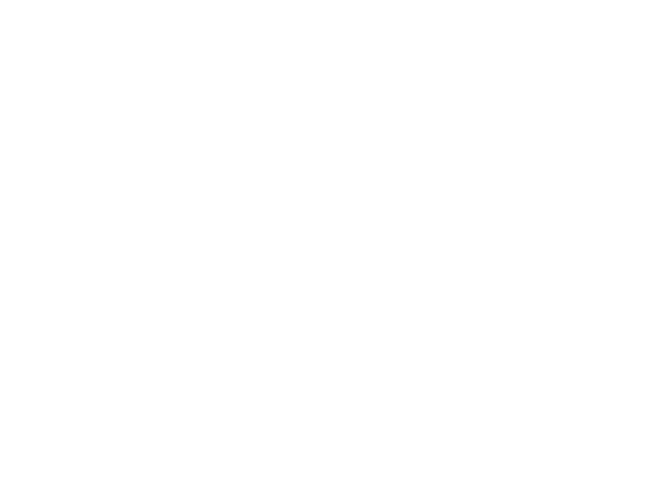

In [4]:
G = nx.Graph()

# empty graph
nx.draw(G)

__Adding nodes:__

Since a network without nodes and edges is kind of useless and boring, we should start by adding nodes. 
Let's assume we are modelling a group of friends.

Adding nodes (people) can be done either node, by node...

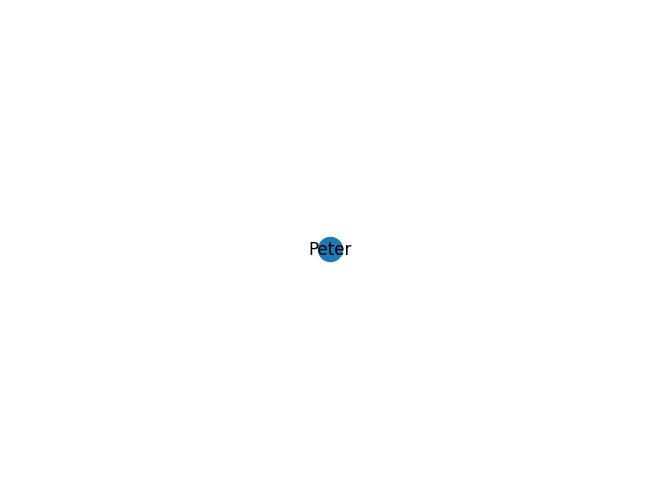

In [5]:
# Adding a first node
G.add_node('Peter')

# draw
nx.draw(G, with_labels = True)

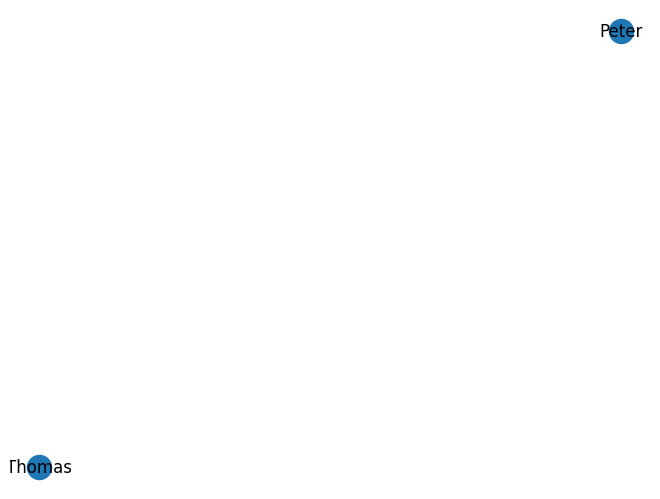

In [6]:
# Adding a second node
G.add_node('Thomas')

nx.draw(G, with_labels = True)

...or by adding the nodes from an iterable thing like lists:

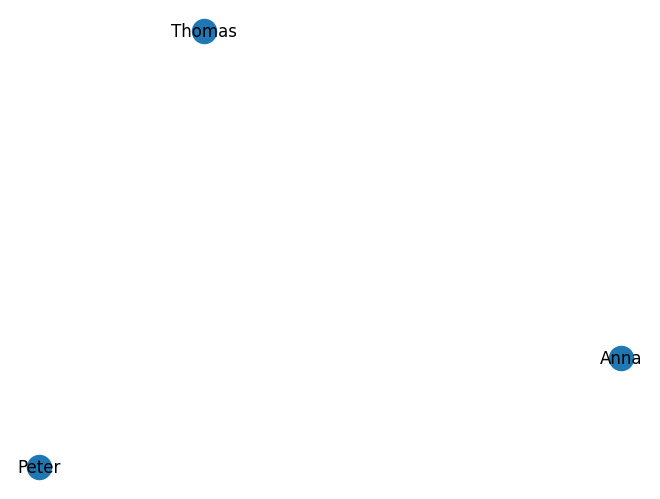

In [7]:
# adding mutliple nodes (people) at once (from an iterable element, like a list)
G.add_nodes_from(['Peter', 'Thomas', 'Anna'])

nx.draw(G, with_labels = True)

Using the `.nodes` method, we can see the currently present nodes in a graph. 

In [8]:
# View nodes
G.nodes

NodeView(('Peter', 'Thomas', 'Anna'))

__Adding attributes:__

Since nodes represent entities they can have certain characteristics: i.e. politicians have a party-affiliation, people have a gender, age etc.
We might want to store these attributes/metadata along with the respective node.

These attributes can also be passed on in iterables using 2-tuples `[(node, attribute), (node, attribute), (node, attribute), ...]`

In [9]:
# a new node with attribute
G.add_node('Tabea', age='27')

# adding an attribute to an existing node
G.nodes['Thomas']['gender'] = 'male'

# attributes for several nodes
G.add_nodes_from([('Peter', {"gender": "male"}), ('Anna', {"gender": "female"})])

# get information on all nodes with attributes
# node 1-3 have gender, node 4 has an age
G.nodes.data()

G.nodes(data = True) # equivalent

NodeDataView({'Peter': {'gender': 'male'}, 'Thomas': {'gender': 'male'}, 'Anna': {'gender': 'female'}, 'Tabea': {'age': '27'}})

In [10]:
# nodes can also have multiple attributes
# also adding Tabeas gender
G.nodes['Tabea']['gender'] = 'female'

# adding a favorite color of every person
G.add_nodes_from([('Peter', {"color": "blue"}), ('Thomas', {'color' : 'purple'}), ('Anna', {"color": "green"}), ('Tabea', {'color' : 'orange'})])


G.nodes.data()

NodeDataView({'Peter': {'gender': 'male', 'color': 'blue'}, 'Thomas': {'gender': 'male', 'color': 'purple'}, 'Anna': {'gender': 'female', 'color': 'green'}, 'Tabea': {'age': '27', 'gender': 'female', 'color': 'orange'}})

In [11]:
G.nodes()
[c for n,c in G.nodes(data='color')]

['blue', 'purple', 'green', 'orange']

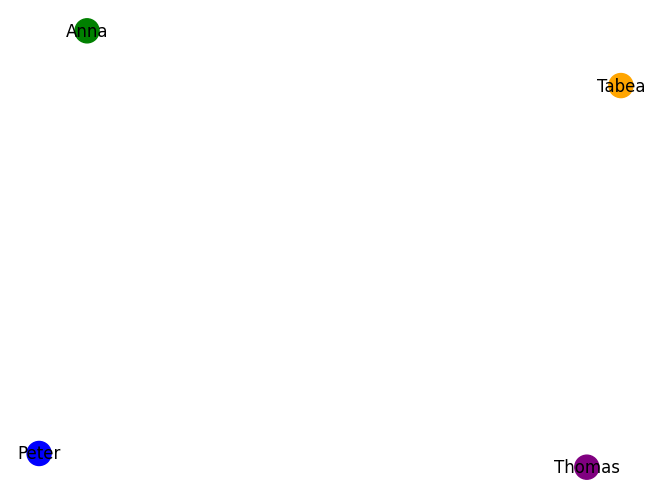

In [12]:
# in order to visualize the people in their favorite color, we first need to extract the colors from the nodes attributes into a list

nx.draw(G, node_color = [c for n,c in G.nodes(data='color')], with_labels = True)

In [13]:
# Get nodes directly connected to another
G.adj['Peter']  # or list(G.neighbors(1))

# empty, we have to add edges!

AtlasView({})

__Adding edges:__

Well, usually we will construct networks to visualize relationships. So we need to add edges, representing these connections.
In our example, we need to add the relationships between the people.

Like nodes, edges can also be added to the graph step by step:

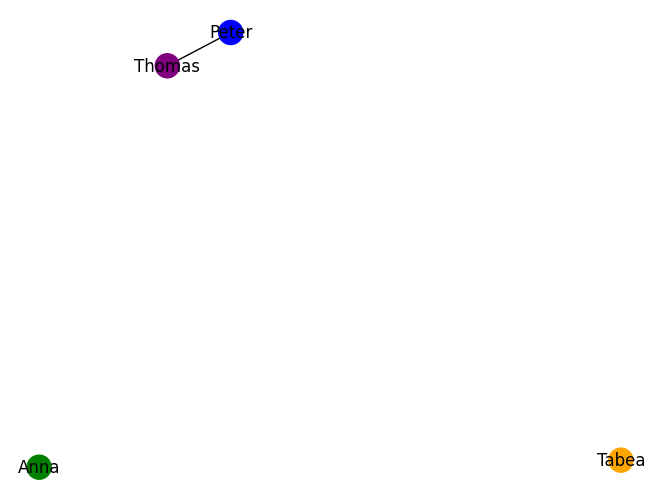

In [14]:
# add an edge from 1 to 2
G.add_edge('Thomas', 'Peter')

nx.draw(G, node_color = [c for n,c in G.nodes(data='color')], with_labels = True) 

Of course, also edges can have attributes, for example a weight, indicating how strong the connection is or the kind of relationships between people.

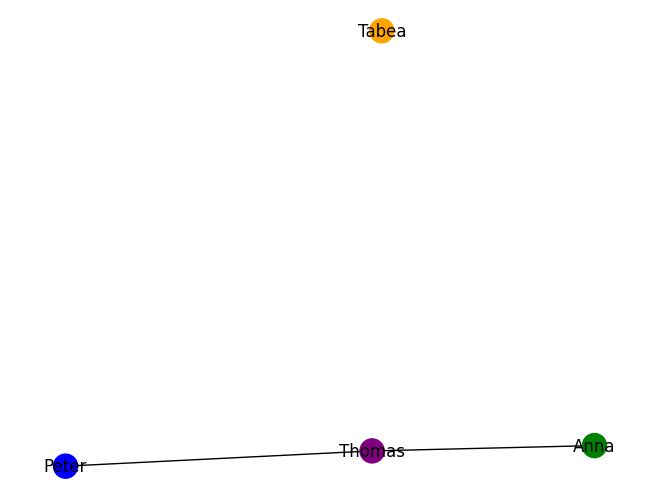

In [15]:
# edge with an attribute indicating how close people (weight) are and what their relationship is (label)

G.add_edge('Thomas', 'Peter', weight = 2, label = 'Kindergarden Friends')
G.add_edge('Thomas', 'Anna', weight = 5, label = 'Siblings')

nx.draw(G, node_color = [c for n,c in G.nodes(data='color')], with_labels = True)

To visualize the relationships with their attributes, we need some extra steps:

In [16]:
# inspect edges
G.edges(data = True)

EdgeDataView([('Peter', 'Thomas', {'weight': 2, 'label': 'Kindergarden Friends'}), ('Thomas', 'Anna', {'weight': 5, 'label': 'Siblings'})])

In [17]:
# First, we need to extract the relationship labels for plotting into a separate dictionary
# (loop over edges (consisting of person1, person2, attribut_dict) and extract p1 and p2 together with their relation (a['label]))

edge_labels = dict([((p1, p2), a['label']) for p1, p2, a in G.edges(data=True)])

edge_labels

{('Peter', 'Thomas'): 'Kindergarden Friends', ('Thomas', 'Anna'): 'Siblings'}

{('Peter',
  'Thomas'): Text(0.49282865122301667, 0.2306242070393489, 'Kindergarden Friends'),
 ('Thomas', 'Anna'): Text(0.4850157153352591, 0.3828290761541419, 'Siblings')}

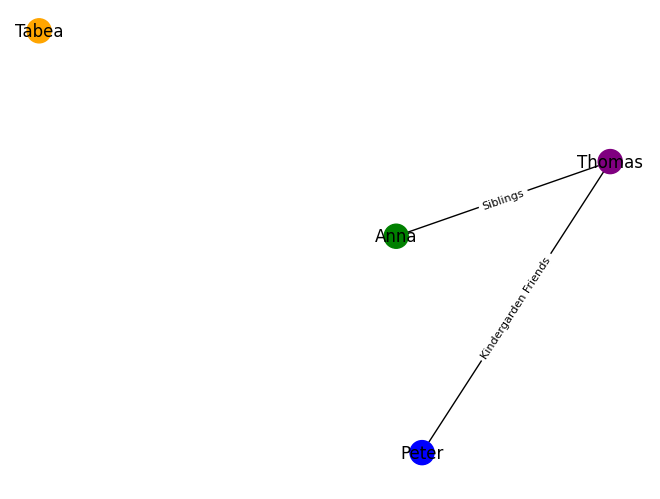

In [18]:
# Second, we need to define a fixed layout (set a seed to the random generation), to ensure that the plotting of the 
# networks nodes and edge-labels happens in the same position
layout = nx.random_layout(G, seed = 2) 


# plot network
nx.draw(G, pos = layout, node_color = [c for n,c in G.nodes(data='color')], with_labels = True)
# add edge labels
nx.draw_networkx_edge_labels(G, pos = layout, edge_labels = edge_labels, font_size=8)

Again, we can also using an iterable object of 2-tuples (the two nodes that shall be connected) or 3-tuples (having an additional attribute) to add edges:

{('Peter',
  'Thomas'): Text(0.4928286453444129, 0.23062418586639963, 'Kindergarden Friends'),
 ('Peter', 'Anna'): Text(0.42818133242634443, 0.17813086920031035, 'Couple'),
 ('Peter',
  'Tabea'): Text(0.3203223812877303, 0.3225970156504928, 'Ex-Partner'),
 ('Thomas',
  'Anna'): Text(0.48501520658171904, 0.38282866304499014, 'Siblings')}

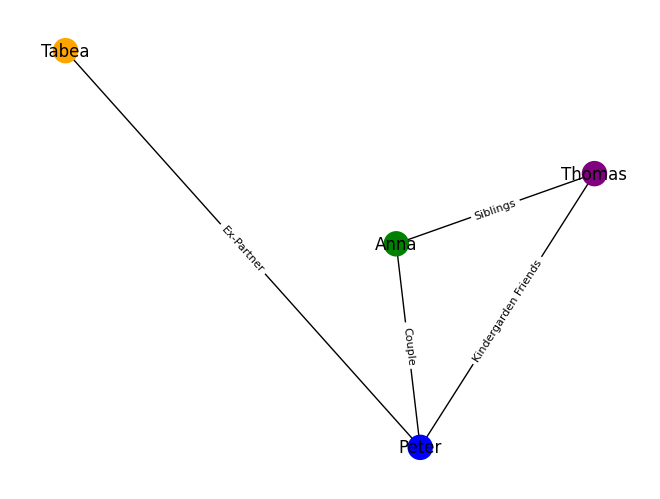

In [19]:
# adding edges from iterables
#G.add_edges_from([('Peter', 'Anna'), ('Peter', 'Tabea)])

# and with attributes
G.add_edges_from([('Peter', 'Anna', {'weight': 1, 'label' : 'Couple'}), ('Peter', 'Tabea', {'weight': 10, 'label' : 'Ex-Partner'})])


# update relations-dictionary
edge_labels = dict([((p1, p2), a['label']) for p1, p2, a in G.edges(data=True)])

# plot
nx.draw(G, pos = layout, node_color = [c for n,c in G.nodes(data='color')], with_labels = True)
nx.draw_networkx_edge_labels(G, pos = layout, edge_labels = edge_labels, font_size=8)

While in general the edge weights influence the positioning of nodes in a graph, there can still be layouts, in which Peter and Anna aren't the closest two nodes (although they have a weight of 1). In the background, however, a specified weight will always influence the positioning algorithm.

I needed to played around with the seed for generating the random layout, until I got a matching and readable layout.

In [20]:
# inspecting edges
G.edges()


print('Number of edges incident to node Peter: ', end='')
print(G.degree['Peter'])  # the number of edges incident to 1 --> only node nr. 1


Number of edges incident to node Peter: 3


__Removing nodes or edges:__

In general, this works analogue to adding nodes or edges:

Tabea is quiet far from the rest of the group. She and Peter broke off contact years ago, when Peter met Anna. Therefore, she is not relevant anymore and we can remove her from the network.

{('Peter',
  'Thomas'): Text(0.4928289760249688, 0.23062537687756146, 'Kindergarden Friends'),
 ('Peter', 'Anna'): Text(0.4281813984753911, 0.17812958259471517, 'Couple'),
 ('Peter',
  'Tabea'): Text(0.3203216851345203, 0.32259880110768147, 'Ex-Partner'),
 ('Thomas',
  'Anna'): Text(0.48501493337881035, 0.38282844120354237, 'Siblings')}

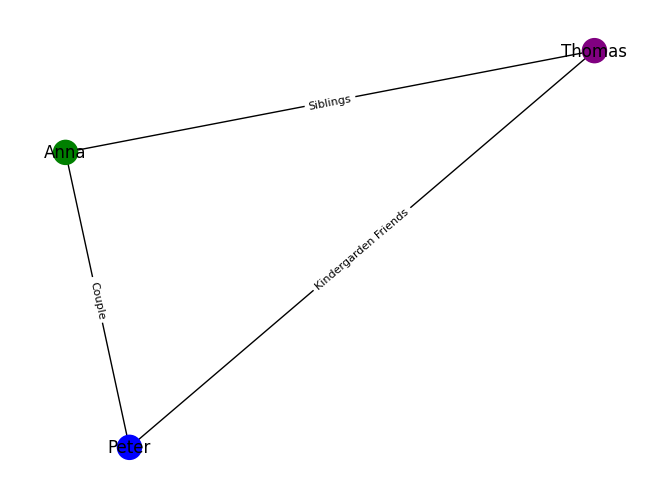

In [21]:
# remove a single node
G.remove_node('Tabea')

# plot
nx.draw(G, pos = layout, node_color = [c for n,c in G.nodes(data='color')], with_labels = True)
nx.draw_networkx_edge_labels(G, pos = layout, edge_labels = edge_labels, font_size=8)

In [22]:
# removing all nodes and edges
G.clear()

#### __3.2 Directed Graphs:__

[NetworkX](https://networkx.org/documentation/stable/reference/classes/digraph.html) also enables us to build directed graphs. This means the edges don't just connect two nodes (without a direction), but are an arrow pointing from the first node to the second one.

For example, 
* While Peter is now in love with Anna (and vice versa), Tabea might still have feelings for him, but he does not have feelings for her.
* If we were to model a Twitter network in terms of followers, for example, we would use directed graphs as a person A can follow B without B also following A.

To see how to build such directed graphs, we now want to model a supply chain.

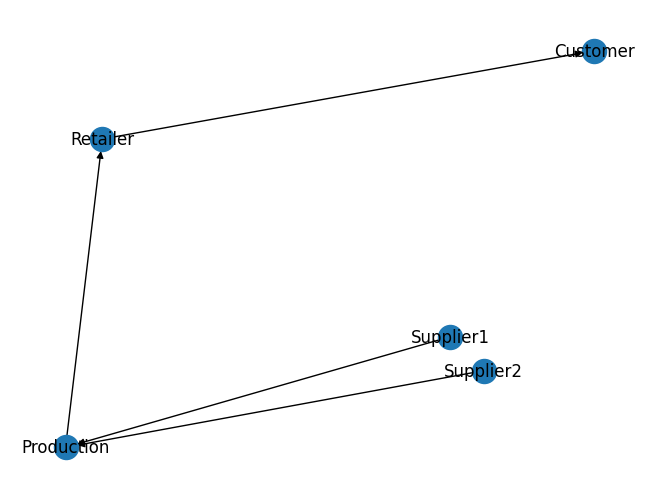

In [23]:
# initialize an empty directed graph
DG = nx.DiGraph()

# add edges (will also automatically add the nodes)
DG.add_weighted_edges_from([('Supplier1', 'Production', 1), ('Supplier2', 'Production', 1), ('Production', 'Retailer', 1.5), ('Retailer', 'Customer', 0.5)])


layout = nx.random_layout(DG, seed = 28) # I again, needed to play around with the seed. This time, I did not found a layout matching the weights. 

nx.draw(DG, pos = layout, with_labels = True)

#### __3.3 Multi Graphs:__

With [Multi Graphs](https://networkx.org/documentation/stable/reference/classes/multigraph.html) you can add several, distinct egdes connecting the same two nodes.

[Multi Directed Graphs](https://networkx.org/documentation/stable/reference/classes/multidigraph.html) allow several, directed edges between two nodes.

Visualizing these different edges can get quiet tricky. 



[(1, 2, 0), (1, 2, 1), (1, 3, 0), (2, 3, 0)]


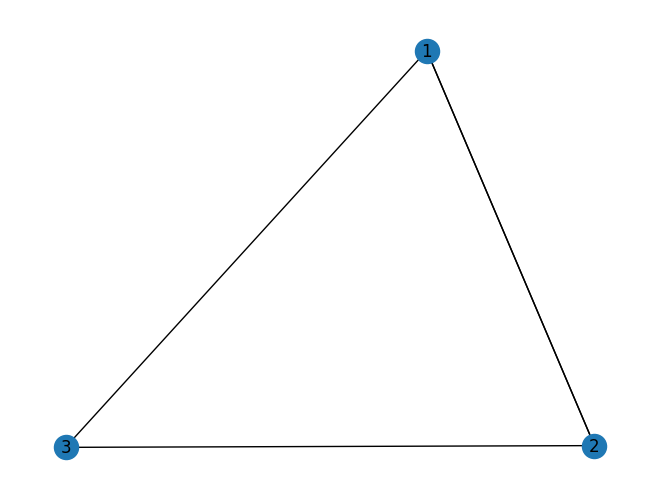

In [24]:
MG = nx.MultiGraph()

MG.add_edges_from([(1, 2), (1, 2), (2, 3), (1, 3)])

print(MG.edges) # there actually exist two edges between 1 and 2

nx.draw(MG, with_labels = True)

#### __3.4 Layout Options__

When visualizing the networks we constructed, a useful parameter is the 'pos' parameter, where you can specify a layout.
The layout is an algorithm determining the nodes positioning in the drawing.
If not specified, the layout will be chosen randomly (resultingly, graphs may look different with every code re-run).

Layout options are: [more details](https://networkx.org/documentation/stable/reference/drawing.html)
* `shell_layout` : position nodes in concentric circles
* `circular_layout`: positions nodes on a circle
* `planar_layout`: position nodes without edge intersections
* `kamada_kawai_layout` : position nodes using Kamada-Kawai path-length cost-function -> good for community detection
* `spring_layout`
* `spectral_layout`

Usually, you will need to research an appropriate layout for your current analysis or play around with different layouts until you reach an insightful plot.

***

## __4. Interactive Tutorial Part__

In this part we are going to investigate the network structre behind swiss politicans tweets. 

#### a) Import the data


Import the two provided csv-files containing 
1. the user profiles
2. the twitter timeline between 2021-07-12 and 2022-07-12

Make sure to load the columns 
* "id" 
* "author_id" and 
* "retweet_user_id" 
as strings (loading them as integers might cause issues).

*Hint:* the `converters` argument in pd.read_csv might be helpful

In [1]:
# import packages
import networkx as nx
import pandas as pd

In [7]:
# Let's get active

users = pd.read_csv("data/users.csv",converters={"id":str})
timelines_all = pd.read_csv("data/timelines.csv",converters={"author_id":str,"retweet_user_id":str})

#### b) Filter out the irrelevant tweets from the timelines dataframe. 

Only those tweets should remain in the dataframe, where the "retweet_user_id" corresponds to the "user_id" of one of the politicians. \
*Hint:* the `.isin()` function might come in handy and you can find the "user_id" of the politicians in the "users" dataframe.

In [8]:
# Let's get active
relevant_tweets = timelines_all[timelines_all["retweet_user_id"].isin(users["id"])]



#### c) Construct a list of vertices (nodes) 

The node attributes should containin the user ids, screen_names, and the political party label of the vertices.

The node list should have the form:

[('25254764', {'username': 'andreaskirstein', 'party': 'AL'}),
('472372843', {'username': 'bergerwthur', 'party': 'AL'}),
...]

In [9]:
# From looking at the df
users
# we can see that we are interested in the columns: id, username, party

,pinned_tweet_id,id,description,name,protected,verified,created_at,location,profile_image_url,username,...,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,entities.url.urls,entities.description.mentions,entities.description.urls,entities.description.hashtags,screenName,party
0,1.180884e+18,25254764,Gemeinderat. Arbeitet in der ETH-Bibliothek. T...,Andreas Kirstein,False,False,2009-03-19T07:21:05.000Z,Zürich,https://pbs.twimg.com/profile_images/149375950...,andreaskirstein,...,734.0,518.0,13312.0,37.0,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,andreaskirstein,AL
1,1.489913e+18,472372843,Alt-Gemeinderat Winterthur (Alternative Liste)...,David B. aus W. 📠 🚱🦬✭,False,False,2012-01-23T21:48:27.000Z,Winterthur,https://pbs.twimg.com/profile_images/131178937...,bergerwthur,...,525.0,373.0,8182.0,17.0,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,bergerwthur,AL
2,NaN,1948049047,NaN,Martin Jucker,False,False,2013-10-08T22:14:11.000Z,NaN,https://pbs.twimg.com/profile_images/378800000...,maenij,...,5.0,21.0,4.0,0.0,NaN,NaN,NaN,NaN,maenij,AL
3,NaN,778497337,Seit 2002 Mitglied des Gemeinderats. Leiter Ko...,Walter Angst,False,False,2012-08-24T16:14:11.000Z,Zürich,https://pbs.twimg.com/profile_images/143018923...,walterangst,...,1025.0,762.0,2032.0,26.0,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...","[{'start': 63, 'end': 74, 'username': 'MV_Zuer...",NaN,NaN,walterangst,AL
4,NaN,383803341,Regierungsrätin/Finanzdirektorin,Astrid Bärtschi,False,False,2011-10-02T15:04:58.000Z,NaN,https://pbs.twimg.com/profile_images/148132495...,asba_j,...,1472.0,1447.0,5800.0,53.0,NaN,NaN,NaN,NaN,asba_j,BDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,NaN,1307125520,"SVP-Nationalrätin TG, Geschäftsfrau",Verena Herzog,False,False,2013-03-27T10:26:07.000Z,Frauenfeld,https://pbs.twimg.com/profile_images/343740423...,verenaherzog,...,1835.0,901.0,1407.0,107.0,"[{'start': 0, 'end': 22, 'url': 'http://t.co/B...",NaN,NaN,NaN,verenaherzog,SVP
329,NaN,1017350089,"Seit 1993 in der Schweiz, verheiratet, 1 Kind,...",Yvette Estermann,False,False,2012-12-17T12:15:21.000Z,Schweiz,https://pbs.twimg.com/profile_images/644400819...,yvette67yvette,...,1948.0,176.0,576.0,113.0,"[{'start': 0, 'end': 20, 'url': 'http://t.co/I...",NaN,NaN,NaN,yvette67yvette,SVP
330,1.446920e+18,121068845,"Give me Liberty, or give me Death!\n\nDer Staa...",Claudio Zanetti,False,False,2010-03-08T10:36:57.000Z,"Gossau (ZH), Schweiz",https://pbs.twimg.com/profile_images/153241242...,zac1967,...,14642.0,10026.0,149896.0,242.0,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,zac1967,SVP
331,1.367472e+18,606601702,"Doch, das kann man schon machen. Gehe den Weg ...",Christoph Stampfli,False,False,2012-06-12T20:05:11.000Z,"Zürich, Schweiz",https://pbs.twimg.com/profile_images/132736255...,chstampfli,...,1257.0,601.0,5370.0,29.0,NaN,"[{'start': 89, 'end': 101, 'username': 'HayekC...",NaN,NaN,chstampfli,UP


In [10]:
# We can acces them as
users['id']

# and one entry
users['id'].iloc[100]

'2352090884'

Utilize this to iterate over each user, and extract his/her id, username and party affiliation into the desired format (shown above).

In [13]:
# Let's get active

vertices = []

for row in range(0,len(users)):

    id = users["id"].iloc[row]
    username = users["username"].iloc[row]
    party = users["party"].iloc[row]

    vertices.append((id,{"username":username,"party":party}))

vertices

[('25254764', {'username': 'andreaskirstein', 'party': 'AL'}),
 ('472372843', {'username': 'bergerwthur', 'party': 'AL'}),
 ('1948049047', {'username': 'maenij', 'party': 'AL'}),
 ('778497337', {'username': 'walterangst', 'party': 'AL'}),
 ('383803341', {'username': 'asba_j', 'party': 'BDP'}),
 ('891735564', {'username': 'beining_bdp', 'party': 'BDP'}),
 ('113616426', {'username': 'bernhardguhl', 'party': 'BDP'}),
 ('327334911', {'username': 'boschettisteen', 'party': 'BDP'}),
 ('894109866', {'username': 'charlespiguet', 'party': 'BDP'}),
 ('98725334', {'username': 'enea_martinelli', 'party': 'BDP'}),
 ('275182338', {'username': 'fa_b_au', 'party': 'BDP'}),
 ('1117756470', {'username': 'hubertackermann', 'party': 'BDP'}),
 ('490318804', {'username': 'jangnaegi', 'party': 'BDP'}),
 ('1543019749', {'username': 'lorenzhess', 'party': 'BDP'}),
 ('366183985', {'username': 'l_thurnherr', 'party': 'BDP'}),
 ('279572642', {'username': 'lukaswopmann', 'party': 'BDP'}),
 ('313901005', {'username

#### d) Then build a list of connections between politicians (the edges), 

Every edge is a pair of two users that exchanged *at least* one retweet with each other (*regardless* of the direction). 

The edge list should have the form: 

[('25254764', '2353332248'),
('25254764', '778497337'),
...]


__Think for a moment:__

How would you conceptually approach this task?

* Where do you need to loop over? 
* What do you need to compare? 
* How can you ensure each pair is only listes once (independant of the order)?

In [17]:
# New list, to store the unique retweet-relations, the edges
edges = []

# Let's get active

for index, row in enumerate(relevant_tweets):
    A = relevant_tweets["author_id"]
    B = relevant_tweets["retweet_user_id"]

    if (A != B and (A,B) not in edges and (B,A) not in edges):
        edges.append((A,B))

edges

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### e) Create and empty graph object, and then add the nodes and the edges (from the list you created).

In [ ]:
# Let's get active



#### f) Plot the network. 

Make sure to color the nodes according to the political party label of the politician and add a legend to the plot.

*Hint:* use the optional function parameters `nodelist` and `node_color` to pass a list of nodes and a list of corresponding colors to the drawing function.


In [ ]:
# Import packages
import matplotlib.pyplot as plt
import matplotlib

##### 1) Color-Dictionary depending on party

In [ ]:
# Dictionary with the party colors (manually defined)
colors = {'AL': "firebrick", 'BDP': 'yellow', 'CVP' : "orange", 'EDU': "red", 'EVP': "gold", 
          'FDP': 'deepskyblue', 'GLP' : "limegreen", 'Green' : "greenyellow", 'SP' : "coral", 
          'SVP' : "seagreen", 'UP' : "goldenrod"}


##### 2) Create a list of colors, in the same order as the nodes (politicians) $\to$ needed for plotting

Therefore, you need to iterate over the vertices (nodes), get the party affiliation of the current politician and depending in that one, add the color from the dictionary.

In [ ]:
# List to store the colors
node_color = []


In [ ]:
# inspect the vertices, how can we access the party label of a single politician?

vertices

In [ ]:
# Let's get active


Now, we have the nodes, the edges and the reffering color for each node (politician).

We can start plotting!

Play around with layouts, the `node_size` and `width` parameter and dont forget to add the colors.

In [ ]:
# Set a figure size
plt.figure(figsize = (15, 10))



# Choose/Play around with a layout 



# Plot the network



To make the plot more comprehensive, you can also add a title as well as a legend, explaining the party colors 

In [ ]:
# set figure size
plt.figure(figsize = (15, 10))


# define a legend:


# make the legend


# set a title


# draw

